In [4]:
import numpy as np
#from sklearn import datasets
#from mpl_toolkits.mplot3d import Axes3D
#import tensorflow.compat.v1 as tf
from matplotlib import cm
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

In [5]:
#Problem 2
#f= f(x,y,z) = x*y + z*3 + x
x = tf.constant(-1.0)
y = tf.constant(2.0)
z = tf.constant(3.0)
    
def myFunction(x,y,z):
    f = x*y + z**3 + x
    return f;

myFunction(x,y,z)

with tf.GradientTape(persistent=True) as tape:
    tape.watch(x)
    tape.watch(y)
    tape.watch(z)
    f = myFunction(x,y,z)
    print(f)
    g_x = tape.gradient(f,x) #g_x = df/dx
    print(g_x)
    h_x = tape.gradient(f,y) #h_x = df/dy
    print(h_x)
    i_x = tape.gradient(f,z) #i_x = df/dz
    print(i_x)

#Below outut suing GradientTape matches with the output from Problem1 

tf.Tensor(24.0, shape=(), dtype=float32)
tf.Tensor(3.0, shape=(), dtype=float32)
tf.Tensor(-1.0, shape=(), dtype=float32)
tf.Tensor(27.0, shape=(), dtype=float32)


In [6]:
#Problem 3
#Create a computational graph for f = x + sig(xy) + y^2
# sig(q) = 1/(1+e^-q)
x = tf.constant(2.0)
y = tf.constant(-1.0)

def sigmoid(q):
    return 1/(1+np.exp(-q))
    
def myFunction(x,y):
    f = x + sigmoid(x*y)+ y**2
    return f;

myFunction(x,y)

with tf.GradientTape(persistent=True) as tape:
    tape.watch(x)
    tape.watch(y)
    f = myFunction(x,y)
    print(f)
    g_x = tape.gradient(f,x) #g_x = df/dx
    print(g_x)
    h_x = tape.gradient(f,y) #h_x = df/dy
    print(h_x)

#Below outut suing GradientTape matches with the output from Problem 3

tf.Tensor(3.1192029, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(-2.0, shape=(), dtype=float32)


In [44]:
#Problem 4
# we will take 200 samples
n_samples = 200

# `m` and `c` are coefficient and bias to get the initial `y`
m = 0.1
c = -1.0
mean = 0.0 # mean of the training data distribution to create
std = 0.2 # standard deviation of the of the training data distribution to create

# number of training epochs 
num_epochs = 199
# learning rate
learning_rate = 0.001

# Create synthetic data of size 200
def create_dataset(n_samples, m, c):
    # create the sample dataset
    x = np.random.randint(0, 10, n_samples)
    random_noise = np.random.normal(mean, std, n_samples) # Adding Gaussian noise of std dev 0.2
    y = m*x + c + random_noise
    x_train, y_train = x[:180], y[:180]
    x_test, y_test = x[180:], y[180:]
    return x_train, y_train, x_test, y_test

Training samples: 180
Test samples: 20


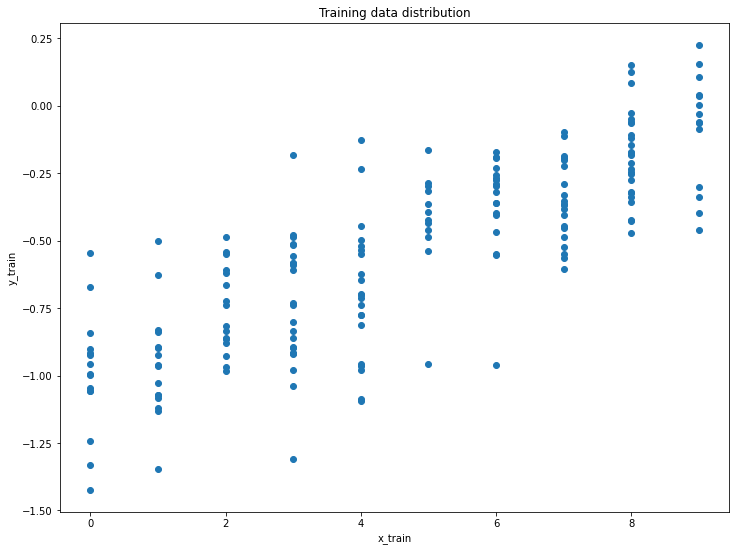

In [45]:
x_train, y_train, x_test, y_test = create_dataset(n_samples, m, c)
print(f"Training samples: {len(x_train)}")
print(f"Test samples: {len(x_test)}")
plt.figure(figsize=(12, 9))
plt.scatter(x_train, y_train)
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.title('Training data distribution')
plt.savefig('training_data.jpg')

In [46]:
# random initial values for weights
W = tf.Variable(np.random.randn())
B = tf.Variable(np.random.randn())
print(W)
print(B)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.1488853>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.24875848>


In [47]:
def pred(x, W, B):
    #calculate y_hat = m*x + c with learned weights and biases.
    #y_pred is the prediction
    
    y_pred = W*x + B
    return y_pred

#Mean squared error loss function
def loss_function(x, y, W, B):
    prediction = pred(x, W, B)
    squared_error = tf.square(prediction - y)
    # calculate the MSE (Mean Sqaured Error)
    mse = tf.reduce_mean(squared_error)
    return mse

#Calculate the derivative of the loss
def calculate_gradient(x, y, W, B):
    with tf.GradientTape() as tape:
        loss_value = loss_function(x, y, W, B)
        
    w_grad, b_grad = tape.gradient(loss_value, [W, B])
    return w_grad, b_grad

In [48]:
for epoch in range(num_epochs):
    w_grad, b_grad = calculate_gradient(x_train, y_train, W, B)   
    dW, dB = w_grad * learning_rate, b_grad * learning_rate
    W.assign_sub(dW)
    B.assign_sub(dB)
    
    if epoch % 10 == 0:
        print(f"Epoch: {epoch}, loss {loss(x_train, y_train, W, B):.3f}")

Epoch: 0, loss 0.541
Epoch: 10, loss 0.492
Epoch: 20, loss 0.475
Epoch: 30, loss 0.467
Epoch: 40, loss 0.461
Epoch: 50, loss 0.457
Epoch: 60, loss 0.452
Epoch: 70, loss 0.448
Epoch: 80, loss 0.444
Epoch: 90, loss 0.440
Epoch: 100, loss 0.435
Epoch: 110, loss 0.431
Epoch: 120, loss 0.427
Epoch: 130, loss 0.423
Epoch: 140, loss 0.419
Epoch: 150, loss 0.415
Epoch: 160, loss 0.412
Epoch: 170, loss 0.408
Epoch: 180, loss 0.404
Epoch: 190, loss 0.400


In [49]:
# check whether if we have desired `m` and `c` or not
print(f"Learned W: {W.numpy()}, learned B: {B.numpy()}")

Learned W: -0.08092311024665833, learned B: 0.13026192784309387


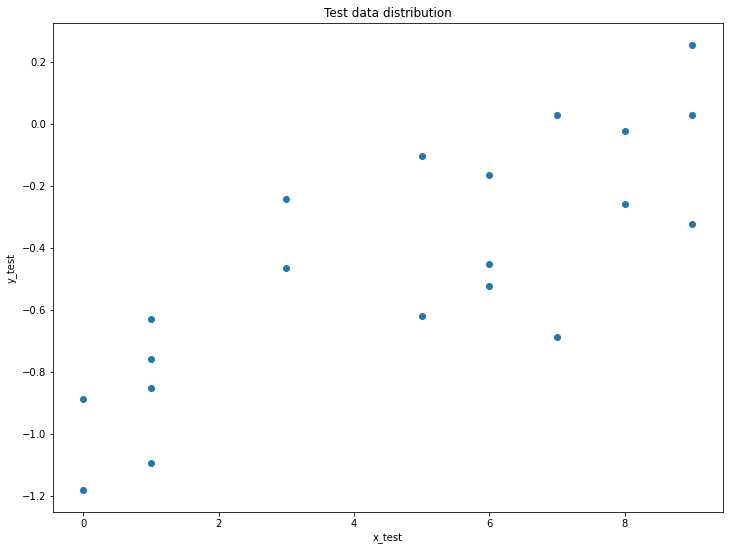

In [50]:
# plot the test set
plt.figure(figsize=(12, 9))
plt.scatter(x_test, y_test)
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.title('Test data distribution')
plt.savefig('test_data.jpg')

In [51]:
test_loss = loss(x_test, y_test, W, B)
print(f"Test loss: {test_loss:.3f}")

Test loss: 0.407


Text(0.5, 1.0, 'Test data distribution and predicted y plot')

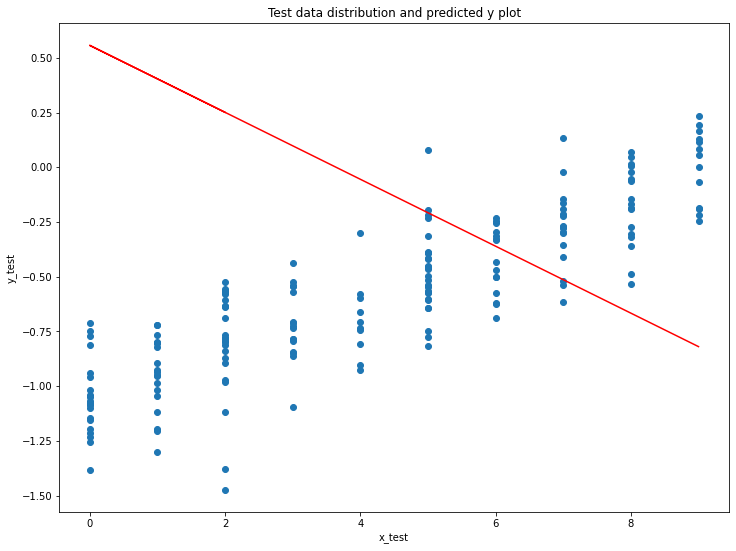

In [33]:
# predicted y on on the test set
y_test_predicted = W.numpy()*x_test + B.numpy()
# plot the predicted y values on the test data distribution
plt.figure(figsize=(12, 9))
plt.plot(x_test, y_test_predicted, c='red')
plt.scatter(x_test, y_test)
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.title('Test data distribution and predicted y plot')